In [3]:
import sys, os
sys.path.append(os.path.abspath(".."))
from src.utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
df_train = load_data("../data/raw/train.csv")
df_test = load_data("../data/raw/test.csv")
# df_sample_submission = pd.read_csv("/content/playground-series-s4e9/sample_submission.csv")

Data Shape:  (188533, 13)
Data Shape:  (125690, 12)


# 1. Exploratory Data Analysis

In [12]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


## Data Definition

This dataset representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

- Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
- Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
- Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
- Transmission: Determine the transmission type, whether automatic, manual, or another variant.
- Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
- Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
- Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

## Descriptive Analysis

In [13]:
df_train.set_index('id', inplace=True)
df_train.shape

(188533, 12)

- Dataset memiliki 188.533 baris dan 13 kolom (dengan kolom 'id').

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


- Dataset memiliki 3 variabel numerik, yaitu 'price', 'model_year', dan 'milage'.
- Variabel lainnya bertipe kategorik.

In [15]:
df_train.describe() 

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


- Variabel 'price' dan 'milage' memiliki nilai maksimum yang sangat jauh dari kuartil ketiganya.

In [16]:
df_train.describe(exclude='int64')

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


## Checking Duplicated Data

In [17]:
df_train[df_train.duplicated(keep=False)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,


- Tidak ada duplikasi data

## Checking Missing Value

In [18]:
df_train.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

- Variabel `accident`, `clean_title`, dan `fuel_type` missing value yang harus ditangani.

## Univariate Analysis

### model_year

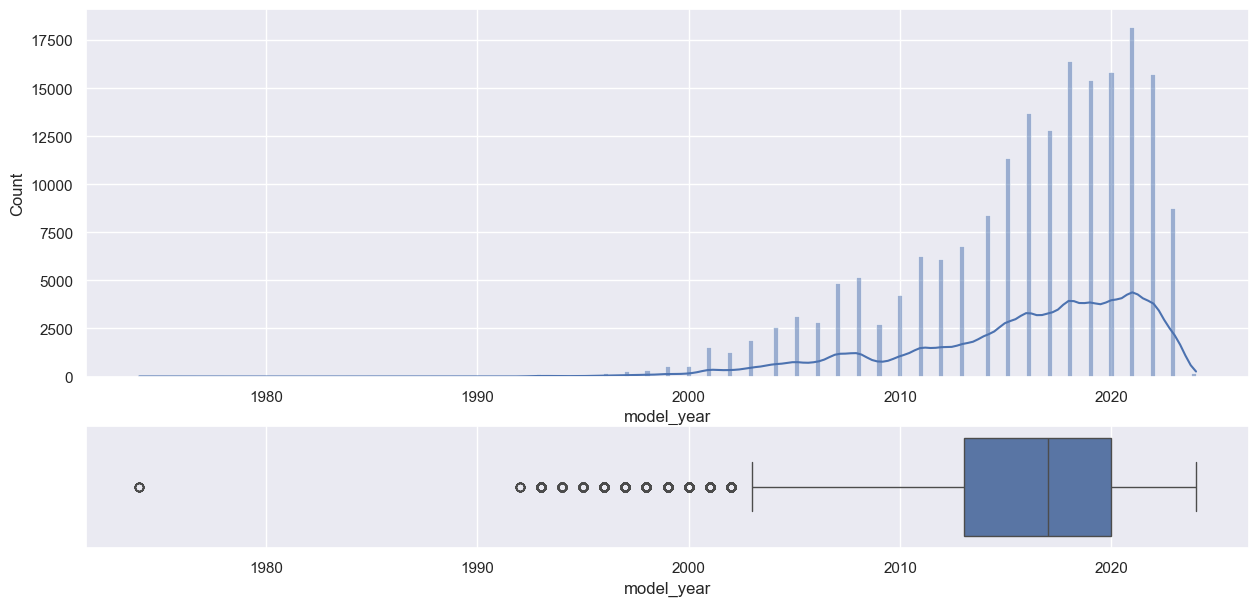

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(data=df_train, x='model_year', kde=True, ax=axes[0])
sns.boxplot(x=df_train['model_year'], ax=axes[1])
plt.show()

- Sebagian besar mobil yang dijual adalah mobil keluaran tahun 2000 keatas.
- Variable `model_year` memiliki beberapa outlier yang perlu diselidiki lebih lanjut.

### Milage

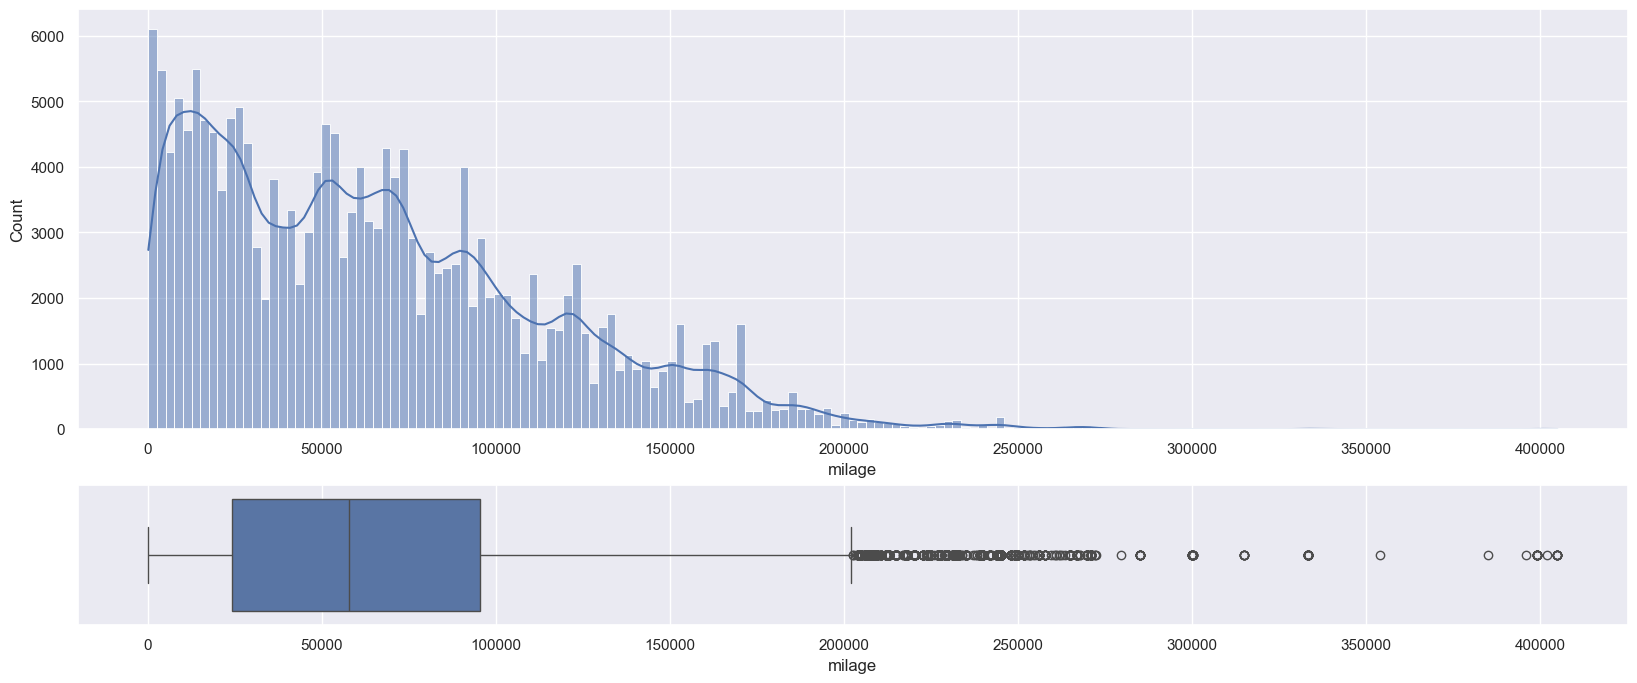

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(data=df_train, x='milage', kde=True, ax=axes[0])
sns.boxplot(x=df_train['milage'], ax=axes[1])
plt.show()

- Variabel `milage` memiliki banyak outlier yang membuat distribusinya sangat skewed.

### Price

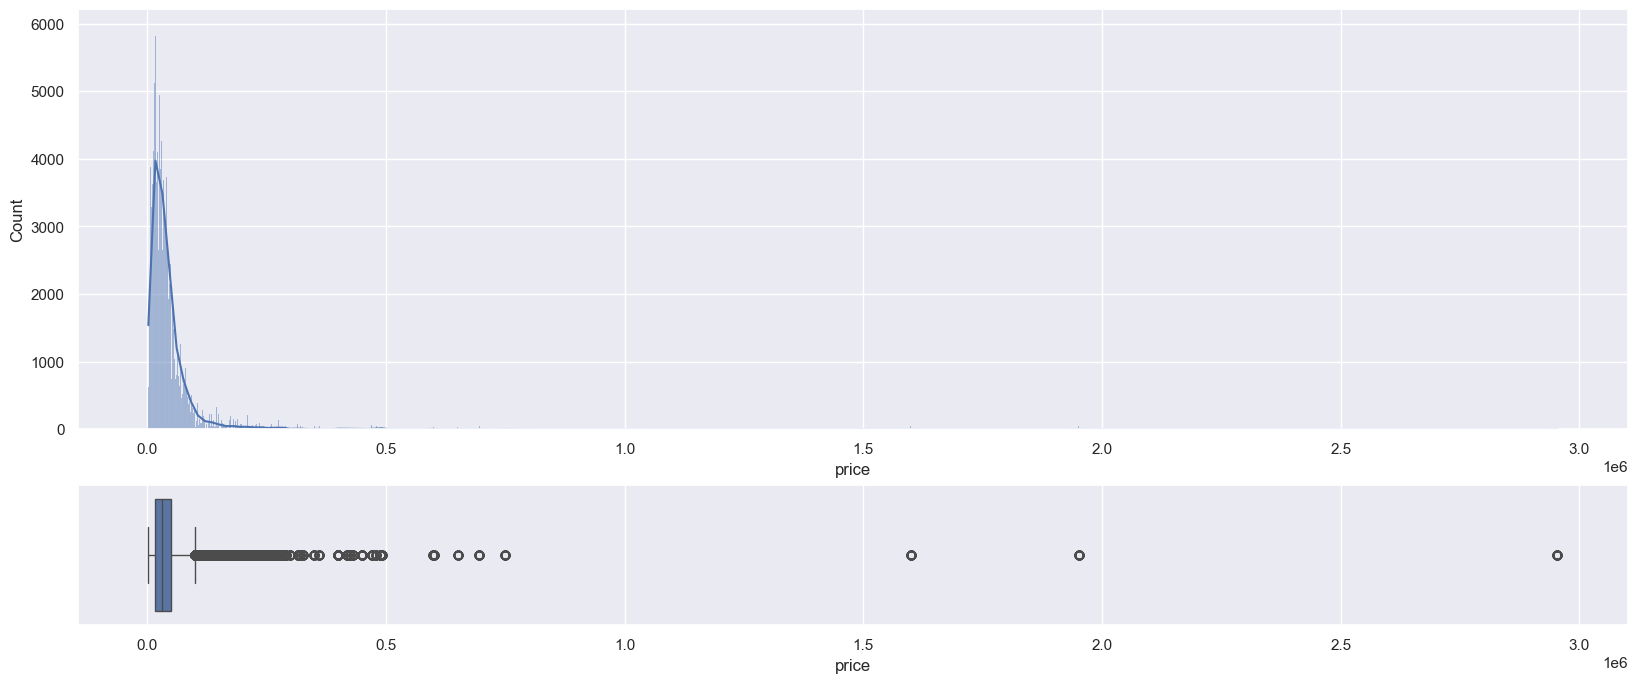

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(data=df_train, x='price', kde=True, ax=axes[0])
sns.boxplot(x=df_train['price'], ax=axes[1])
plt.show()

- Variabel `price` memiliki banyak nilai outlier yang terlalu jauh dari upper whisker.

In [16]:
Q1 = df_train['price'].quantile(0.25)
Q3 = df_train['price'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5*IQR

outlier_id = df_train[df_train['price']> upper_whisker].index

df_outlier =df_train.loc[outlier_id]
df_outlier_1 = df_outlier[(df_outlier['price'] > upper_whisker) & (df_outlier['price'] < 500_000)]
df_outlier_2 = df_outlier[(df_outlier['price'] > 500_000) & (df_outlier['price'] < 1_000_000)]
df_outlier_3 = df_outlier[(df_outlier['price'] > 1_500_000) & (df_outlier['price'] < 2_000_000)]
df_outlier_4 = df_outlier[df_outlier['price'] > 2_500_000]

df_non_outlier = df_train.loc[~df_train.index.isin(outlier_id)]

In [22]:
# df_outlier_4.set_index(['brand','model','model_year']).sort_index()

In [23]:
df_outlier_4.groupby(['model','model_year'])['price'].agg(['count', 'mean', 'min', 'max'])

,,count,mean,min,max
model,model_year,,,,
1500 Classic Warlock,2019,1,2954083.0,2954083,2954083
1500 Laramie,2022,3,2954083.0,2954083,2954083
1500 Limited,2018,1,2954083.0,2954083,2954083
300C Base,2003,1,2954083.0,2954083,2954083
AMG GLE AMG GLE 63 S-Model 4MATIC,2017,1,2954083.0,2954083,2954083
AMG GT 53 Base,2023,1,2954083.0,2954083,2954083
Bronco Raptor,2023,1,2954083.0,2954083,2954083
Continental GT V8,2021,1,2954083.0,2954083,2954083
Corvette Base,2005,1,2954083.0,2954083,2954083


In [24]:
# df_outlier_3.groupby(['brand','model','model_year']).apply(lambda x: x)

In [25]:
# avg_price_outlier = df_outlier_4.groupby(['model', 'model_year'])['price'].agg(['mean', 'count'])
# avg_price_outlier = avg_price_outlier.reset_index().rename(columns={'mean': 'outlier_avg_price', 'count': 'outlier_count'})

# avg_price_non_outlier = df_non_outlier.groupby(['model', 'model_year'])['price'].agg(['mean','median', 'count'])
# avg_price_non_outlier = avg_price_non_outlier.reset_index().rename(columns={'mean': 'non_outlier_avg_price','median':'non_outlier_median', 'count': 'non_outlier_count'})

# combined_df = pd.merge(avg_price_outlier, avg_price_non_outlier, on=['model', 'model_year'], how='left')

# print("Hasil Perbandingan:")
# display(combined_df)

In [26]:

# avg_price_outlier = df_outlier.groupby(['model', 'model_year'])['price'].agg(['mean', 'count'])
# avg_price_outlier = avg_price_outlier.reset_index().rename(columns={'mean': 'outlier_avg_price', 'count': 'outlier_count'})

# avg_price_non_outlier = df_non_outlier.groupby(['model', 'model_year'])['price'].agg(['mean', 'count'])
# avg_price_non_outlier = avg_price_non_outlier.reset_index().rename(columns={'mean': 'non_outlier_avg_price', 'count': 'non_outlier_count'})

# combined_df = pd.merge(avg_price_outlier, avg_price_non_outlier, on=['model', 'model_year'], how='left')

# print("Hasil Perbandingan:")
# display(combined_df)

### Brand

In [22]:
df_train['brand'].nunique()

57

In [20]:
df_train['brand'].value_counts()

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

In [21]:
np.sort(df_train['brand'].unique())

array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
       'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
       'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
       'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
       'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
       'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo', 'smart'], dtype=object)

- Tidak terdapat kesalahan pada variabel `brand`.
- Variabel `brand` memiliki 57 kategori.

### Model

In [24]:
df_train['model'].nunique()

1897

In [26]:
df_train['model'].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
ForTwo Pure                         2
XLR Base                            1
X5 3.0i                             1
X5 xDrive40e                        1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

- Variabel `model` memiliki 1897 kategori.

### Fuel Type

In [27]:
df_train['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [30]:
df_train['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [31]:
df_train[df_train['fuel_type'] =='not supported']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
4823,Chevrolet,Suburban LT,2011,109646,not supported,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Beige,None reported,Yes,18998
18000,Porsche,Camaro 2SS,2015,67000,not supported,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,11500
19182,Nissan,Mirai Limited,2000,131000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,5000
27199,Subaru,Outback 2.5i Limited,2017,116000,not supported,175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Gray,Black,At least 1 accident or damage reported,Yes,27499
33030,Nissan,Mirai Limited,2009,137333,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,White,Gray,At least 1 accident or damage reported,Yes,12999
60717,Chevrolet,Silverado 1500 RST,2020,19200,not supported,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,58000
74096,Toyota,Mirai Limited,2021,79876,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Red,Black,None reported,Yes,15000
86897,Lexus,IS 350 F Sport,2022,9500,not supported,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,60000
94425,Porsche,Cayenne Turbo GT,2018,52000,not supported,550.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Gray,At least 1 accident or damage reported,Yes,35000


- Variabel `fuel_type` memiliki missing value yang tersimpan sebagai `-`,`not supported` dan`nan` serta perlu ditambahkan kategori `Hydrogen fuel`.

### Engine

In [28]:
pd.DataFrame(df_train['engine'].unique())

,0
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
...,...
1112,151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hy...
1113,184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capab...
1114,78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel
1115,139.0HP 1.6L 4 Cylinder Engine Plug-In Electri...


In [30]:
mask = ~df_train['engine'].str.contains('cylinder', case=False, na=False)

In [31]:
df_train.loc[mask, 'engine'].unique()

array(['2.7L V6 24V PDI DOHC Twin Turbo',
       'Electric Motor Electric Fuel System', '5.2L V10 40V PDI DOHC',
       '518.0HP Electric Motor Electric Fuel System',
       '3.6L V6 24V GDI DOHC', '4.0L V8 32V GDI DOHC Twin Turbo',
       '835.0HP Electric Motor Electric Fuel System',
       '5.7L V8 16V MPFI OHV', 'Dual Motor - Standard',
       '3.0L V6 24V GDI DOHC Twin Turbo',
       '3.8L V8 32V MPFI DOHC Twin Turbo',
       '3.4L V6 24V PDI DOHC Twin Turbo Hybrid',
       '3.5L V6 24V PDI DOHC Twin Turbo', '2.0L I4 16V PDI DOHC Turbo',
       '2.4L I4 16V GDI DOHC', '2.0 Liter DOHC Turbo',
       '3.6L V6 24V MPFI DOHC', '6.0L V8 16V MPFI OHV Flexible Fuel',
       '2.0L I4 16V GDI DOHC Turbo', '2.3L I4 16V GDI DOHC Turbo',
       '670.0HP Electric Motor Electric Fuel System', 'Electric',
       '5.3L V8 16V GDI OHV',
       '425.0HP Electric Motor Electric Fuel System', '2.0 Liter',
       '3.0L V6 24V GDI DOHC Turbo', '3.8L V6 24V GDI DOHC',
       '3.8L H6 24V GDI DOHC Twin T

In [33]:
df_copy = df_train.copy()
df_copy['engine_word_count'] = df_copy['engine'].astype(str).str.split().str.len()
df_copy['engine_word_count'].unique()

array([7, 8, 5, 9, 6, 4, 1, 2, 3])

In [38]:
df_copy[df_copy['engine_word_count']==1]['engine'].unique()

array(['Electric', '–', 'V6', '4.0L', 'I4', '2.5L', 'V8', '3.0L'],
      dtype=object)

In [39]:
df_copy[df_copy['engine_word_count']==2]['engine'].unique()

array(['2.0 Liter', '3.5 Liter', '5.6 Liter', '5.0 Liter', '3.6 Liter',
       '6.4 Liter', '3.0 Liter', '5.4 Liter', '2.5 Liter', '4.6 Liter',
       '2.4 Liter', '4.0 Liter', '4.4 Liter', '6.2 Liter', '5.7 Liter',
       '120 AH', 'Battery Electric', '5.3 Liter', '5.5 Liter',
       '1.8 Liter'], dtype=object)

In [40]:
df_copy[df_copy['engine_word_count']==3]['engine'].unique()

array(['2.0 Liter Turbo', '3.0 Liter Turbo', '2.0 Liter TFSI',
       '3.6 Liter DOHC', '4.0 Liter TFSI', '3.5 Liter DOHC',
       '3.0 Liter TFSI', '3.5 Liter SOHC', 'Standard Range Battery',
       '2.5L I4 16V', '3.0 Liter GTDI', '12 Cylinder Engine',
       '2.0 Liter Supercharged', '2.0 Liter TSI', '5.0L 8 Cylinder',
       '4.0 Liter Turbo', '2.9 Liter Turbo', '1.5 Liter Turbo',
       '3.5 Liter GTDI'], dtype=object)

In [41]:
df_copy[df_copy['engine_word_count']==4]['engine'].unique()

array(['Dual Motor - Standard', '2.0 Liter DOHC Turbo',
       '3.6 Liter SIDI DOHC', '4.0 Liter Twin Turbo',
       '3.0 Liter Twin Turbo', '3.6L V6 GDI DOHC', '4.7 Liter Twin Turbo',
       '4.4 Liter Twin Turbo', '5.4 Liter SC DOHC',
       '2.7 Liter DOHC Turbo', '6.6 Liter Twin Turbo',
       '3.0 Liter SC ULEV', '2.0 Liter DOHC T/C', '3.0 Liter DOHC Turbo',
       'Dual AC Electric Motors'], dtype=object)

In [42]:
df_copy[df_copy['engine_word_count']==5]['engine'].unique()

array(['Electric Motor Electric Fuel System', '5.2L V10 40V PDI DOHC',
       '3.6L V6 24V GDI DOHC', '5.7L V8 16V MPFI OHV',
       '2.4L I4 16V GDI DOHC', '3.6L V6 24V MPFI DOHC',
       '5.3L V8 16V GDI OHV', '3.8L V6 24V GDI DOHC',
       '2.5L H4 16V MPFI DOHC', '4.6L V8 32V MPFI DOHC',
       '2.5L I4 16V GDI DOHC', '4.0L H6 24V GDI DOHC',
       '6.3L V12 48V GDI DOHC', '3.4L H6 24V MPFI DOHC',
       '5.0L V8 32V PDI DOHC', '3.5L V6 24V PDI DOHC',
       '6.4L V8 16V MPFI OHV', '3.8L H6 24V MPFI DOHC',
       '3.3L V6 24V GDI DOHC', '5.7L V8 32V MPFI DOHC',
       '3.0 Liter DOHC Twin Turbo', '2.0L I4 16V GDI DOHC',
       '2.0L I4 16V MPFI DOHC', '2.5L I4 16V PDI DOHC',
       '6.2L V8 16V GDI OHV', '3.5L V6 24V GDI SOHC',
       '5.6L V8 32V GDI DOHC', '3.5L V6 24V MPFI DOHC',
       '2.5L H4 16V GDI DOHC', '6.0L V8 16V MPFI OHV',
       '2.4L I4 16V MPFI DOHC', '5.2L V10 40V GDI DOHC',
       '6.5L V12 48V MPFI DOHC', '3.5L 24V SOHC I-VTEC V6',
       '3.2L V6 24V MPFI DOHC'

In [43]:
df_copy[df_copy['engine_word_count']==6]['engine'].unique()

array(['518.0HP Electric Motor Electric Fuel System',
       '835.0HP Electric Motor Electric Fuel System',
       '2.0L I4 16V PDI DOHC Turbo', '2.0L I4 16V GDI DOHC Turbo',
       '2.3L I4 16V GDI DOHC Turbo',
       '670.0HP Electric Motor Electric Fuel System',
       '425.0HP Electric Motor Electric Fuel System',
       '3.0L V6 24V GDI DOHC Turbo',
       '455.0HP Electric Motor Electric Fuel System',
       '3.6L V6 24V MPFI DOHC Hybrid', '2.0L I4 16V GDI SOHC Turbo',
       '1.5L I3 12V PDI DOHC Turbo', '5.0L V8 32V GDI DOHC Supercharged',
       '557.0HP Electric Motor Electric Fuel System',
       '200.0HP Electric Motor Electric Fuel System',
       '232.0HP 1.3L Rotary engine Gasoline Fuel',
       '214.0HP Electric Motor Electric Fuel System',
       'Intercooled Turbo Diesel V-8 6.7 L/406',
       '778.0HP Electric Motor Electric Fuel System',
       '2.5L I4 16V PDI DOHC Turbo', '2.5L I4 16V GDI DOHC Turbo',
       '271.0HP Electric Motor Electric Fuel System',
       '4

In [44]:
df_copy[df_copy['engine_word_count']==7]['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel',
       '208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
       '2.7L V6 24V PDI DOHC Twin Turbo',
       '312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel',
       '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel',
       '523.0HP 4.4L 8 Cylinder Engine Gasoline Fuel',
       '503.0HP 4.0L 8 Cylinder Engine Gasoline Fuel',
       '310.0HP 4.6L 8 Cylinder Engine Gasoline Fuel',
       '469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel',
       '429.0HP 5.0L 8 Cylinder Engine Gasoline Fuel',
       '210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel',
       '316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '381.0HP 5.7L 8 Cylinder Engine Gasoline Fuel',
       '450.0HP 6.7L 8 Cylinder Engine Diesel Fuel',
       '236.0HP 4.0L V

In [45]:
df_copy[df_copy['engine_word_count']==8]['engine'].unique()

array(['320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability',
       '355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability',
       '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '335.0HP 3.0L V6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '230.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '3.4L V6 24V PDI DOHC Twin Turbo Hybrid',
       '385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capability',
       '385.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel',
       '350.0HP 6.7L Straight 6 Cylinder Engine Diesel Fuel',
       '190.0HP 4.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '333.0HP 3.2L Straight 6 Cylinder Engine Gasoline Fuel',
       '389.0HP 3.0L Straight 6 Cylinder Engine Plug-In Electric/Gas',
       '235.0HP 3.2L Straight 6 Cylinder Engine Gasoline Fuel',
       '169.0HP 2.5L 4 Cylinder Engine Flex Fuel Capability',
       '400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel',
       '350.0HP 3.4L Flat 6 Cylinder Engine Gasoline Fuel'

In [46]:
df_copy[df_copy['engine_word_count']==9]['engine'].unique()

array(['395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '382.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '362.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '335.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '355.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '429.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '375.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '369.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid'],
      dtype=object)

- Sebagian besar nilai-nilai pada kolom'engine' dengan panjang kata yang sama, memiliki struktur penulisan yang sama.
- Variabel `engine` dapat diekstrak menjadi beberapa kolom:
  - `horsepower`     : float64     # contoh: 369.0, 214.0, 482.0
  - `engine_size`    : float64     # contoh: 3.0, 2.5, 4.4
  - `cylinder`       : int64       # contoh: 4, 6, 8, 10, 12
  - `is_electric`    : int64       # 0 = tidak, 1 = ya
  - `is_turbo`       : int64       # 0 = tidak, 1 = ya
  - `fuel_system`    : category    # contoh: MPFI, GDI, PDI, DOHC, SOHC, dll


-  Tipe bahan bakar dapat diekstrak dari `engine` jika `fuel_type` bernilai nan, -, not supported, atau ' '.
- Tipe bahan bakar `hydrogen fuel` tidak muncul pada kolom`fuel_type`, tetapi muncul pada kolom`engine`.

### Transmission

In [47]:
df_train['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [48]:
df_train['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [49]:
df_train[~df_train['transmission'].str.lower().str.contains(r'\b(automatic|manual|a/t|m/t|at|mt)\b', na=False)]['transmission'].unique()

C:\Users\daffa\AppData\Local\Temp\ipykernel_23156\3707552715.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train[~df_train['transmission'].str.lower().str.contains(r'\b(automatic|manual|a/t|m/t|at|mt)\b', na=False)]['transmission'].unique()


array(['Transmission w/Dual Shift Mode', 'CVT Transmission',
       'Transmission Overdrive Switch', 'F', 'CVT-F', '–', '2', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Speed'], dtype=object)

- Variabel `transmission` dapat disederhanakan menjadi 4 kategori, yaitu `A/T`, `M/T`, `CVT`, dan `Unknown`.

### ext_col

In [50]:
df_train['ext_col'].value_counts()

ext_col
Black                                 48658
White                                 43815
Gray                                  25293
Silver                                16995
Blue                                  14555
                                      ...  
Granite Crystal Metallic Clearcoat        5
GT SILVER                                 5
Blue Caelum                               5
BLUE                                      3
Mango Tango Pearlcoat                     2
Name: count, Length: 319, dtype: int64

In [51]:
df_train['ext_col'].unique()

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Firecracker Red Clearcoat',
       'Phytonic Blue Metallic', 'Blu', 'Orange', 'Brown',
       'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat',
       'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl',
       'Majestic Plum Metallic', 'designo Diamond White Metallic',
       'Oxford White', 'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red

In [52]:
ext_col_mask = ~df_train['ext_col'].str.lower().str.contains(r'\b(black|blue|gray|silver|green|red|tan|yellow|brown|white|grey|orange|purple|gold|blu|beige)\b', na=False)
df_train[ext_col_mask]['ext_col'].value_counts()

C:\Users\daffa\AppData\Local\Temp\ipykernel_23156\2183128968.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ext_col_mask = ~df_train['ext_col'].str.lower().str.contains(r'\b(black|blue|gray|silver|green|red|tan|yellow|brown|white|grey|orange|purple|gold|blu|beige)\b', na=False)


ext_col
–                                     366
Granite Crystal Clearcoat Metallic    365
Ebony Twilight Metallic               289
Satin Steel Metallic                  154
Magnetic Metallic                     152
                                     ... 
Tempest                                 8
Ametrin Metallic                        8
Glacier                                 8
Granite Crystal Metallic Clearcoat      5
Mango Tango Pearlcoat                   2
Name: count, Length: 71, dtype: int64

- Variabel `ext_col` dapat disederhanakan menjadi kategori warna dasar seperti blue, red, black, silver, white, gold, orange, purple, dan beige.
- Warna lain dapat disederhanakan menjadi `other` atau `unknown`.

### int_col

In [53]:
df_train['int_col'].value_counts()

int_col
Black           107674
Beige            24495
Gray             21204
Brown             5810
Red               5145
                 ...  
Bianco Polar         7
Classic Red          7
Cobalt Blue          6
WHITE                6
ORANGE               4
Name: count, Length: 156, dtype: int64

In [54]:
int_col_mask = ~df_train['ext_col'].str.lower().str.contains(r'\b(black|blue|gray|silver|green|red|tan|yellow|brown|white|grey|orange|purple|gold|blu|beige)\b', na=False)

df_train[ext_col_mask]['ext_col'].value_counts()

C:\Users\daffa\AppData\Local\Temp\ipykernel_23156\2779700307.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  int_col_mask = ~df_train['ext_col'].str.lower().str.contains(r'\b(black|blue|gray|silver|green|red|tan|yellow|brown|white|grey|orange|purple|gold|blu|beige)\b', na=False)


ext_col
–                                     366
Granite Crystal Clearcoat Metallic    365
Ebony Twilight Metallic               289
Satin Steel Metallic                  154
Magnetic Metallic                     152
                                     ... 
Tempest                                 8
Ametrin Metallic                        8
Glacier                                 8
Granite Crystal Metallic Clearcoat      5
Mango Tango Pearlcoat                   2
Name: count, Length: 71, dtype: int64

- Sama seperti `ext_col`, variabel `ext_col` dapat disederhanakan menjadi warna dasarnya, 'others', dan 'uknown'.

### Accident

In [55]:
df_train['accident'].value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [56]:
print(df_train['accident'].isna().sum())

2452


- Variabel `accident` memiliki missing value

### clean_title

In [57]:
df_train['clean_title'].value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

In [58]:
print(df_train['clean_title'].isna().sum())

21419


- Untuk variabel `clean_title` terdapat 21419 data yang perlu dikategorikan 'no'.

## Kesimpulan EDA

- Variabel `accident`, `clean_title`, dan `fuel_type` missing value yang harus ditangani.
- Variable `model_year`, `milage`, `price` memiliki outlier.
- Terdapat 1897 `model` mobil
- Variabel `fuel_type` memiliki missing value yang tersimpan sebagai `-`,`not supported` dan`nan` serta perlu ditambahkan kategori `hydrogen`.
- 'E85 flex fuel' perlu diseragamkan menjadi 'flex fuel'
- Variabel `engine` dapat diekstrak menjadi beberapa kolom agar lebih deskriptif seperti:
  - `horsepower`     : float64     # contoh: 369.0, 214.0, 482.0
  - `engine_size`    : float64     # contoh: 3.0, 2.5, 4.4
  - `cylinder`       : int64       # contoh: 4, 6, 8, 10, 12
  - `is_electric`    : int64       # 0 = tidak, 1 = ya
  - `is_turbo`       : int64       # 0 = tidak, 1 = ya
  - `fuel_system`    : category    # contoh: MPFI, GDI, PDI, DOHC, SOHC, dll


-  Tipe bahan bakar dapat diekstrak dari `engine` jika `fuel_type` bernilai nan, - , ' ', atau `not supported`.
- Variabel `transmission` dapat disederhanakan menjadi 4 kategori, yaitu `A/T`, `M/T`, dan `Unknown`.
- Variabel `ext_col` dan `int_col` dapat disederhanakan menjadi kategori warna dasar seperti blue, red, black, silver, white, gold, orange, purple, dan beige sedangkan warna lain dapat disederhanakan menjadi `other` atau `unknown`.
- Untuk variabel `clean_title` terdapat 21419 data yang perlu dikategorikan 'Unknown'.